## Training a word2vec model from scratch

In [2]:
import gzip
import gensim 

In [6]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    print("reading file...")
      
    with open (input_file, 'r') as f:   
        lines = f.readlines()
        for line in lines:
            # do some pre-processing and return a list of words for each review text
            # you can print the output here to understand the preprocessing (tokenizing)
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a series of words
# so this becomes a list of lists

# point to the location on your filesystem
data_file = 'data/shakespeare.txt'

documents = list (read_input (data_file))
print("Done reading data file")

print(documents[0:10])

reading file...
Done reading data file
[[], [], ['the', 'sonnets'], [], ['by', 'william', 'shakespeare'], [], [], [], [], ['from', 'fairest', 'creatures', 'we', 'desire', 'increase']]


Now let's train the word2vec model using our document variable (which is a list of word lists). Note that you can specify a number of hyperparameters below:
* min_count removes all words that occur less then min_count
* window: window size in the skip-gram
* workers: how many threads to use
* size: number of dimension of your new word embedding vector (typically 100-200). Smaller datasets require a smaller number



In [21]:
model = gensim.models.Word2Vec (documents, size=150, window=2, min_count=2, workers=4)
model.train(documents,total_examples=len(documents),epochs=10)

(6705201, 8675160)

In [22]:
w1 = "king"
model.wv.most_similar (positive=w1)

[('prince', 0.6778877377510071),
 ('fifth', 0.6378481388092041),
 ('sixth', 0.6065809726715088),
 ('duke', 0.6031304597854614),
 ('bolingbroke', 0.5930298566818237),
 ('bastard', 0.5856661796569824),
 ('emperor', 0.5521674752235413),
 ('ghost', 0.5441737174987793),
 ('plantagenet', 0.5426896810531616),
 ('princess', 0.5294144749641418)]

In [23]:
# look up top 6 words similar to 'smile'
w1 = ["smile"]
model.wv.most_similar (positive=w1,topn=6)

[('wink', 0.801526665687561),
 ('laugh', 0.7841230630874634),
 ('blush', 0.7673452496528625),
 ('shine', 0.7582794427871704),
 ('lacedaemon', 0.754690408706665),
 ('rail', 0.751758337020874)]

In [24]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('england', 0.7173498868942261),
 ('naples', 0.6551616191864014),
 ('rome', 0.6399035453796387),
 ('venice', 0.6248741149902344),
 ('egypt', 0.6221017837524414),
 ('realm', 0.5836130380630493)]

In [27]:
# look up top 6 words similar to 'sword'
w1 = ["sword"]
model.wv.most_similar (positive=w1,topn=6)

[('head', 0.7464984655380249),
 ('knife', 0.7071756720542908),
 ('knee', 0.7048714756965637),
 ('weapon', 0.697693943977356),
 ('finger', 0.6895721554756165),
 ('conscience', 0.6877733469009399)]

In [28]:
# get everything related to stuff on the royalty
w1 = ["king",'queen','prince']
w2 = ['farmer']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('duke', 0.6454849243164062),
 ('princess', 0.5998762249946594),
 ('bolingbroke', 0.5786054134368896),
 ('emperor', 0.5720871686935425),
 ('ghost', 0.5666854381561279),
 ('bastard', 0.5610008239746094),
 ('warwick', 0.5597424507141113),
 ('gaunt', 0.5429732799530029),
 ('duchess', 0.5426961183547974),
 ('empress', 0.5323967337608337)]

### Calculate the similarity between 2 words, outliers

In [29]:
# similarity between two similar words
model.wv.similarity(w1="pretty",w2="beautiful")


0.5525643541111571

In [30]:
# similarity between two opposing words
model.wv.similarity(w1="king",w2="farmer")


0.05745621445830723

In [31]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["cat","dog","france"])


'france'

In [32]:
model.wv['france']

array([ 1.97269469e-01, -9.04029429e-01,  1.47488996e-01, -9.88753513e-02,
        6.41455352e-02,  2.03531072e-01,  6.97970688e-02,  4.83442023e-02,
        6.41207874e-01,  5.41327178e-01, -3.14969808e-01,  3.70132148e-01,
        2.67325610e-01, -7.19787087e-03, -8.40408504e-02, -3.48092169e-02,
        4.85500216e-01, -3.80229622e-01,  6.50449842e-02,  6.25941932e-01,
       -9.11989570e-01,  3.24151874e-01,  4.72424507e-01,  4.64876831e-01,
        5.03622985e-04,  3.02778184e-01,  2.53881305e-01, -7.25200921e-02,
        2.11028054e-01,  5.73558211e-01,  4.03996438e-01,  2.44697660e-01,
        5.00542819e-01,  4.08025950e-01, -9.77277279e-01,  1.01079023e+00,
        1.76777005e-01,  1.47022083e-01, -2.68938750e-01, -9.67497230e-01,
       -1.20422268e+00, -1.97759131e-03,  1.48668766e+00, -2.86806375e-02,
        3.46672945e-02,  6.24797523e-01,  3.38135123e-01,  1.42602308e-03,
        3.11930865e-01,  1.52029172e-01,  1.69331148e-01, -7.01734900e-01,
       -1.29097283e+00,  

## Bonus: visualising our model in t-SNE: 

/home/joel/anaconda2/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


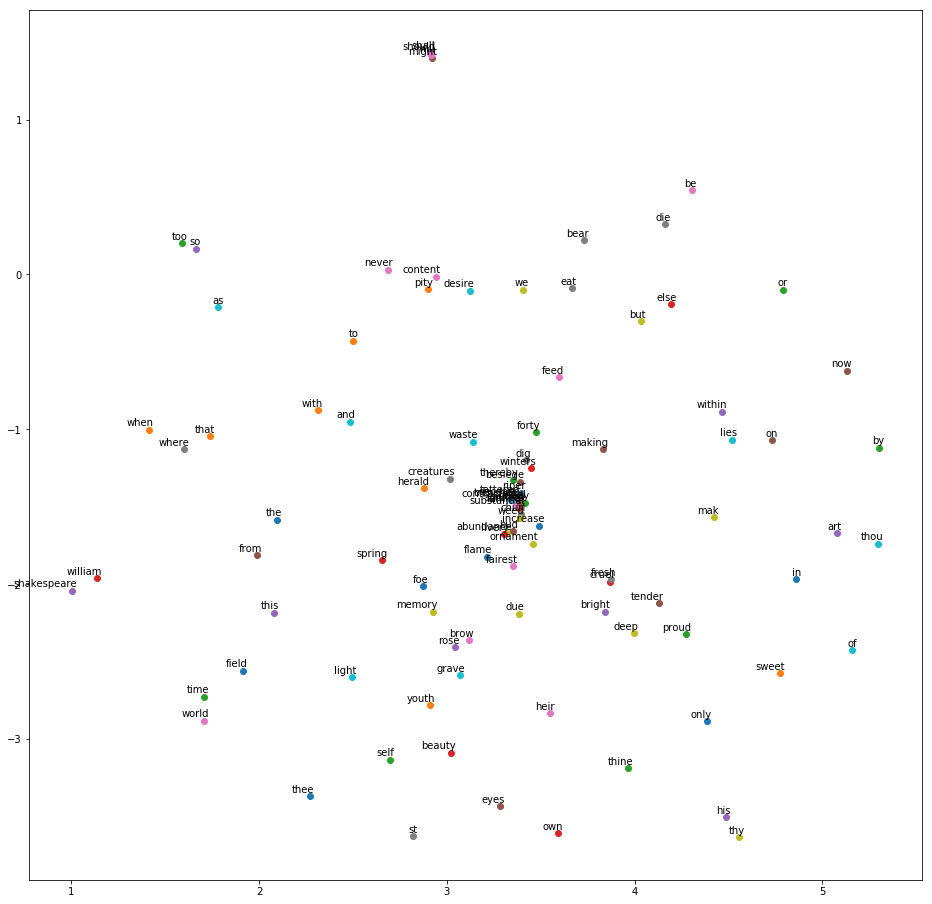

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    
    # fyi: to test specific labels instead of all the words in the vocab: 
#     labels = ['king', 'queen', 'prince', 'farmer', 'blue', 'red']
#     tokens = []
#     for label in labels: 
#         tokens.append(model[label])

    labels = []
    tokens = []
    
    count = 0
    for word in model.wv.vocab:
        # to speed up the process, let's limit to the first 100 elements
        if count < 100:
            tokens.append(model[word])
            labels.append(word)
            count = count+1

    # set the t-sne values
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model)

## References

* https://radimrehurek.com/gensim/models/word2vec.html
* https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
* https://github.com/kavgan/nlp-text-mining-working-examples/tree/master/word2vec
* https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5